# Logistic Data Fitting

Notebook for experimenting with different models to fit Quai data.

## Inputs

1. $\beta_0$ - Intercept of logistic regression
2. $\beta_1$ - Coeffecient of difficulty over $log_2$ difficulty
3. $d$ - The current block difficulty

## Probability of Taking Qi

$$\frac{1}{1+exp(-(\beta_0 + \beta_1 \cdot \frac{d}{log_2(d)}))}$$

## Equal Likelihood Probability Parameters

$$\frac{1}{1+exp(-(\beta_0 + \beta_1 \cdot \frac{d}{log_2(d)}))} = .5$$

$$.5 = .5 \cdot [exp(-(\beta_0 + \beta_1 \cdot \frac{d}{log_2(d)}))]$$

$$1 = exp(-(\beta_0 + \beta_1 \cdot \frac{d}{log_2(d)}))$$

$$0 = \beta_0 + \beta_1 \cdot \frac{d}{log_2(d)}$$

$$\beta_0 =  - \beta_1 \cdot \frac{d}{log_2(d)}$$

## Synthetic Data

In [78]:
from math import log2
import numpy as np
import matplotlib.pyplot as plt

##### Inputs

# Difficulty where p = .5
midpoint_difficulty = 1000

# Left and right bounds for difficulty

# Case 1
left_difficulty_endpoint = 100
right_difficulty_endpoint = 3000

# Case 2
#left_difficulty_endpoint = 800
#right_difficulty_endpoint = 1200

# Case 3 -> Fails
#left_difficulty_endpoint = 1600
#right_difficulty_endpoint = 2000


# Case 4 -> Fails
#left_difficulty_endpoint = 2000
#right_difficulty_endpoint = 5000

# Any value > 0 for beta1 parameter
beta1 = .05


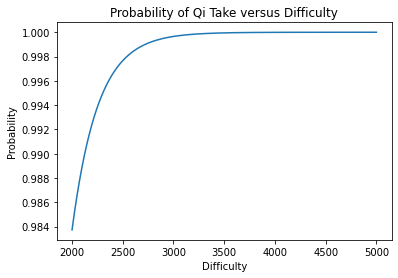

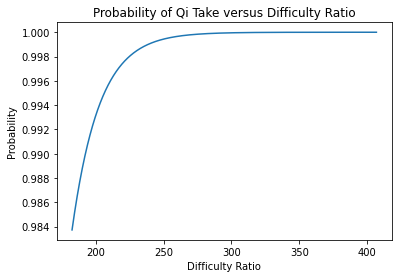

In [79]:
np.random.seed(0)

##### Functions

def find_probability_qi(beta0, beta1, difficulty):
    return 1 / (1 + np.exp(-(beta0 + beta1 * difficulty / log2(difficulty))))

def find_qi_taken(p):
    if np.random.rand() < p:
        return 1
    else:
        return 0

##### Calculations
beta0 = midpoint_difficulty / log2(midpoint_difficulty) * - beta1

##### Data creation

# Define the range from left to right difficulty endpoint
X = np.arange(left_difficulty_endpoint, right_difficulty_endpoint+1, 1)

# Find probabilities for each 
Y_prob = np.array([find_probability_qi(beta0, beta1, x) for x in X])

# Find whether or not qi is taken based on randomness
Y = [find_qi_taken(p) for p in Y_prob]

plt.plot(X, Y_prob)
plt.xlabel("Difficulty")
plt.ylabel("Probability")
plt.title("Probability of Qi Take versus Difficulty")
plt.show()

# Convert to difficulty ratio
X = X / np.log2(X)

plt.plot(X, Y_prob)
plt.xlabel("Difficulty Ratio")
plt.ylabel("Probability")
plt.title("Probability of Qi Take versus Difficulty Ratio")
plt.show()

# Reshape
X = np.array([[1, x] for x in X])

In [80]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none', fit_intercept=False
    )
model.fit(X, Y)
print("Actual Beta 0: {}, Actual Beta 1: {}".format(beta0, beta1))
print("Predicted Beta 0: {}, Predicted Beta 1: {}".format(model.coef_[0][0], model.coef_[0][1]))



Actual Beta 0: -5.017166594399686, Actual Beta 1: 0.05
Predicted Beta 0: -0.0010918755661016475, Predicted Beta 1: 0.026403124566798608


## Simulation Data

Ignore for now

In [ ]:
from pandas.core.common import flatten
from math import log2

Y = list(flatten([x["Qi Taken"] for x in state["Mining Log"]]))
Y = [x>0 for x in Y]
Y = np.array(Y).astype(int)
X = list(flatten([x["Block Difficulty"] for x in state["Mining Log"]]))
X = [x/log2(x) for x in X]
X = [[1,x] for x in X]
X = np.array(X)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none', fit_intercept=False
    )
model.fit(X[:4000], Y[:4000])
print(model.coef_)

model = LogisticRegression(penalty='none', fit_intercept=False
    )
model.fit(X[4000:8000], Y[4000:8000])
print(model.coef_)

model = LogisticRegression(penalty='none', fit_intercept=False
    )
model.fit(X[8000:12000], Y[8000:12000])
print(model.coef_)

model = LogisticRegression(penalty='none', fit_intercept=False
    )
model.fit(X[12000:16000], Y[12000:16000])
print(model.coef_)

model = LogisticRegression(penalty='none', fit_intercept=False
    )
model.fit(X, Y)
print(model.coef_)

from sklearn.metrics import r2_score


print(model.score(X, Y))
print(Y.mean())
print(np.corrcoef(X[:,1], Y))
print(model.predict(X))
print(r2_score(Y, model.predict(X)))